# Setup environment

In [1]:
%matplotlib inline

In [2]:
# In case of plotly not showing the charts run!
import plotly.io as pio
pio.renderers.default='notebook'

# Load Data

Due to hardware restrictions we will work with 20% of the data to work an example of the risk groups.

In [3]:
import pandas as pd

# Get Evaluation data
X_eval= pd.read_csv('data/X_eval_20200206.csv')
X_eval = X_eval.sample(frac=0.2, random_state = 2020)

T_eval= pd.read_csv('data/T_eval_20200206.csv',names=['time'])
T_eval = T_eval.sample(frac=0.2, random_state = 2020)
T_eval = T_eval['time']

E_eval= pd.read_csv('data/E_eval_20200206.csv',names=['event'])
E_eval = E_eval.sample(frac=0.2, random_state = 2020)
E_eval = E_eval['event']

# Load model

In [4]:
# load model
from pysurvival.utils import load_model
model = load_model('model/churn_model_20200303.zip')

Loading the model from model/churn_model_20200303.zip


# Risk Groups

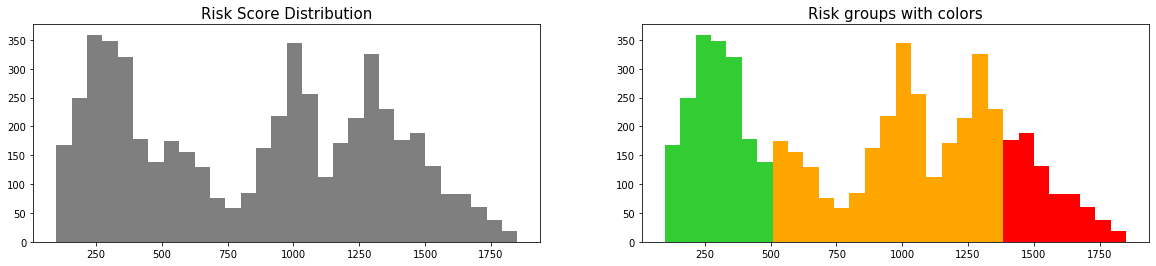

In [6]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=model, X=X_eval,
    use_log = False, num_bins=30, figure_size=(20, 4),
    low={'lower_bound':0, 'upper_bound':500, 'color':'limegreen'},
    medium={'lower_bound':500, 'upper_bound':1350,'color':'orange'},
    high={'lower_bound':1350, 'upper_bound':2000,  'color':'red'}
    )

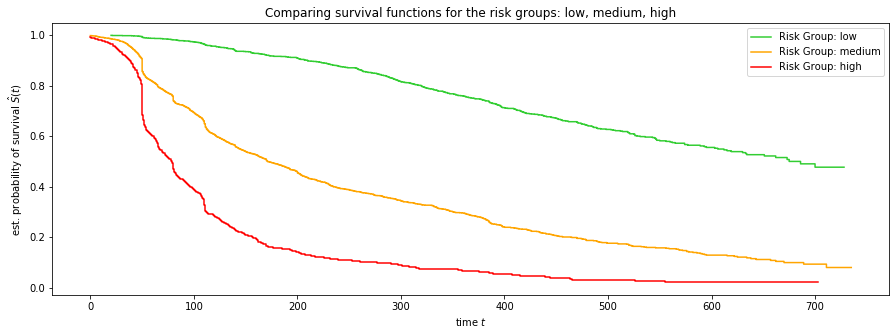

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

# Initializing the figure
fig, ax = plt.subplots(figsize=(15, 5))

for risk_group in ('low','medium','high'):
    time, survival_prob = kaplan_meier_estimator(
        E_eval.iloc[risk_groups[risk_group][1]].astype('bool'),
        T_eval.iloc[risk_groups[risk_group][1]])
    
    plt.step(time, survival_prob, where="post",
             label="Risk Group: %s" % risk_group,
             color = risk_groups[risk_group][0])

plt.title("Comparing survival functions for the risk groups: low, medium, high")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best");